In [2]:
# подключаем необходимые для анализа библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize' : (40, 9) }, style='whitegrid')

In [3]:
# экспортируем данные из экселя в питон и создаем датафрейм claims
claims = pd.read_excel('/Users/tsyrdugar/Downloads/Претензии (июнь 2021).xlsx')

In [4]:
# считаем количество строк и столбцов из датафрейма claims
claims.shape

(544, 16)

In [5]:
# переименовываем название колонок для удобства чтения 
claims.rename({'[$Обращение].[Номер обращения]' : 'номер_обращения',
               '[$Обращение].[Класс обращения согласно МС]' : 'класс_обращения',
               '[$Обращение].[Продукт обращения согласно МС]' : 'продукт_обращения', 
               '[$Обращение].[Стрим обращения согласно МС]' : 'стрим_обращения', 
               '[$Обращение].[Группа продуктов обращения согласно МС]' : 'группа_продуктов', 
               '[$Обращение].[Тип обращения согласно МС]' : 'тип_обращения', 
               '[$Обращение].[Тематика обращения согласно МС]' : 'тематика_обращения', 
               '[$Комментарии].[Суть обращения]' : 'суть_обращения', 
               '[$Комментарии].[Итоговое заключение]' : 'итоговое_заключение', 
               '[$Блок продукта].[Блок продукта]' : 'блок_продукта', 
               '[$Канал поступления обращения].[Канал поступления обращения]' : 'канал_поступления_обращения',
               '[$Причина обращения].[Причина обращения]' : 'причина_обращения', 
               '[$Тема обращения].[Тема обращения]' : 'тема_обращения', 
               '[$Дата регистрации обращения].[Дата]' : 'дата_регистрации_обращения', 
               '[$Дата решения по обращению].[Дата]' : 'дата_решения_обращения',
               '[$Тема пункта обращения].[Тема пункта обращения]' : 'тема_пункта_обращения'}, axis=1, inplace=True)

In [6]:
# типы данные у колонок claims
claims.dtypes

номер_обращения                object
класс_обращения                object
продукт_обращения              object
стрим_обращения                object
группа_продуктов               object
тип_обращения                  object
тематика_обращения             object
суть_обращения                 object
итоговое_заключение            object
блок_продукта                  object
канал_поступления_обращения    object
причина_обращения              object
тема_обращения                 object
дата_регистрации_обращения     object
дата_решения_обращения         object
тема_пункта_обращения          object
dtype: object

In [7]:
# меняем типы данные у "дата_регистрации_обращения" и "дата_решения_обращения"
claims['дата_регистрации_обращения'] = pd.to_datetime(claims['дата_регистрации_обращения'], dayfirst=True)
claims['дата_решения_обращения'] = pd.to_datetime(claims['дата_решения_обращения'], dayfirst=True)

In [8]:
claims['дата_регистрации_обращения']

0     2021-06-17
1     2021-06-16
2     2021-06-18
3     2021-06-16
4     2021-06-18
         ...    
539   2021-05-31
540   2021-06-09
541   2021-06-23
542   2021-06-04
543   2021-06-10
Name: дата_регистрации_обращения, Length: 544, dtype: datetime64[ns]

In [9]:
# дата регистрации первого обращения
claims['дата_регистрации_обращения'].min()

Timestamp('2021-05-12 00:00:00')

In [10]:
# дата решения первого обращения
claims['дата_решения_обращения'].min()

Timestamp('2021-06-01 00:00:00')

In [11]:
# дата регистрации последнего обращения
claims['дата_регистрации_обращения'].max()

Timestamp('2021-06-30 00:00:00')

In [12]:
# дата решения последнего обращения
claims['дата_решения_обращения'].max()

Timestamp('2021-06-30 00:00:00')

In [13]:
# меняем тип данных у "дата_регистрации_обращения" и "дата_решения_обращения"
claims['дата_регистрации_обращения'] = claims['дата_регистрации_обращения'].apply(pd.to_datetime)
claims['дата_решения_обращения'] = claims['дата_решения_обращения'].apply(pd.to_datetime)

In [14]:
# создаем колонку "разница_в_днях_в_решении_обращения"
claims['разница_в_днях_в_решении_обращения'] = (claims['дата_решения_обращения'] - claims['дата_регистрации_обращения']).dt.days

In [15]:
# среднее время обработки претезий
claims['разница_в_днях_в_решении_обращения'].mean()

2.3823529411764706

In [16]:
# медианное значение времени обратки претензий
claims['разница_в_днях_в_решении_обращения'].median()

1.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='разница_в_днях_в_решении_обращения'>

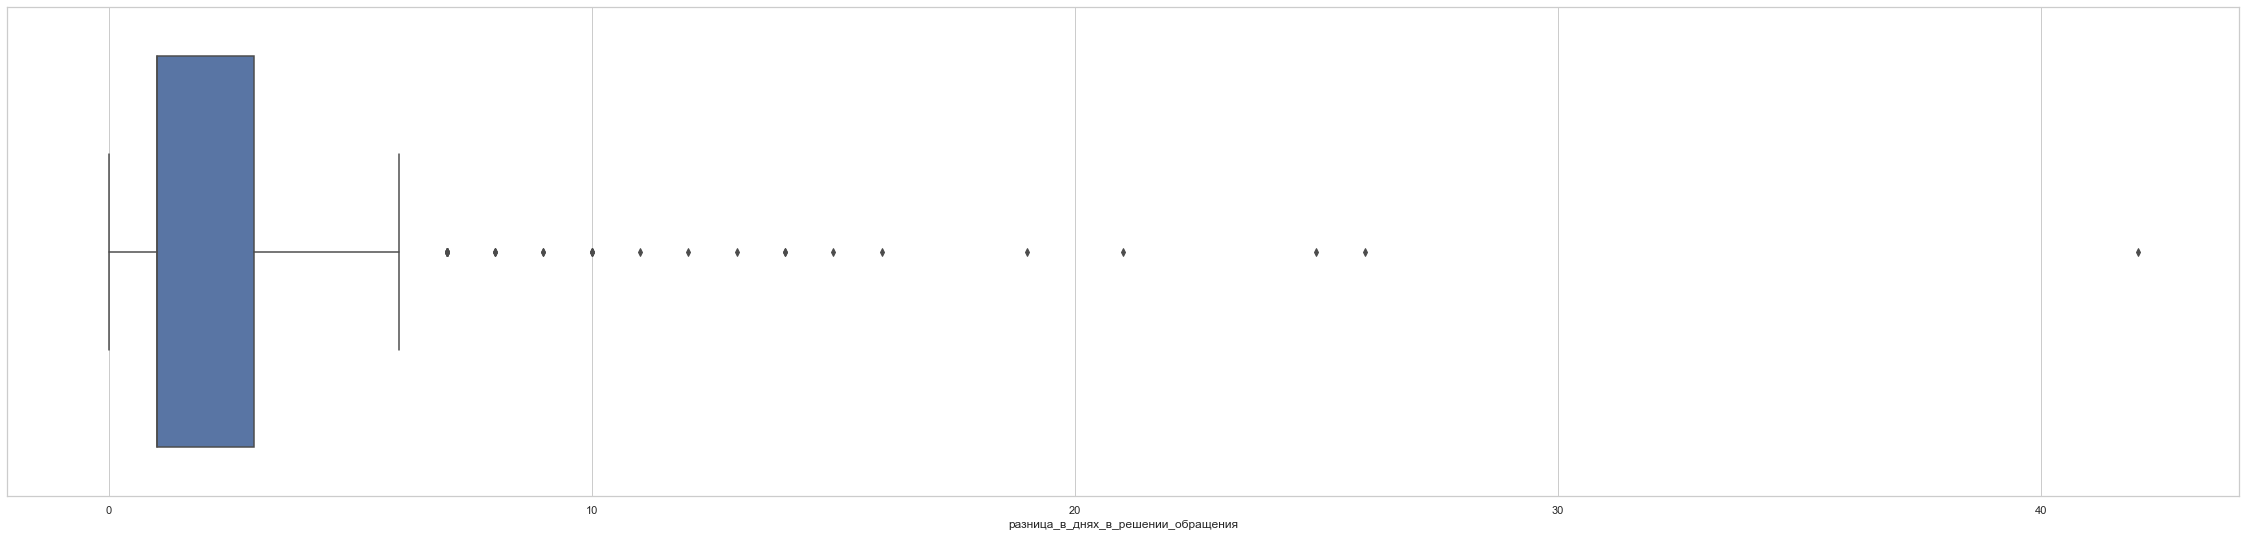

In [82]:
# визуализация(boxplot) разницы в днях в решении обращения
sns.boxplot(claims['разница_в_днях_в_решении_обращения'])

In [88]:
# количество претензий, которые обрабатывались больше значения верхней границы "усов", то есть больше 7 дней
claims.query('разница_в_днях_в_решении_обращения >=7').shape[0]

31

In [110]:
# "обращения-выбросы", которые обрабатывались больше 7 дней и сгруппированы по темам
claims.query('разница_в_днях_в_решении_обращения >=7') \
    .groupby('тема_обращения', as_index=False) \
    .agg({'номер_обращения' : 'count'}) \
    .rename({'номер_обращения' : 'количество_обращений'}, axis=1) \
    .sort_values('количество_обращений', ascending=False) 

,тема_обращения,количество_обращений
0,КОМИССИИ/ТАРИФЫ,22
3,УСЛУГИ / ЭКВАЙРИНГ,6
2,УСЛУГИ / КЛУБ КЛИЕНТОВ,2
1,УКД (ТЕХ. ПРОБЛЕМА) / СМС-ИНФОРМИРОВАНИЕ,1


In [79]:
# обращение, которое решалось больше всего времени - 42 дня. 
claims['разница_в_днях_в_решении_обращения'].max()

42

In [80]:
# индекс этого обращения
claims['разница_в_днях_в_решении_обращения'].idxmax()

465

In [84]:
# полная информация об этом обращении
claims.iloc[465]

номер_обращения                                                             U2105190148
класс_обращения                                                               ПРЕТЕНЗИЯ
продукт_обращения                                                                   РКО
стрим_обращения                                                           DAILY BANKING
группа_продуктов                                                                     ПУ
тип_обращения                                                           КЛИЕНТСКИЕ ПУТИ
тематика_обращения                                               НЕСОГЛАСИЕ С КОМИССИЕЙ
суть_обращения                        КЛИЕНТ УТВЕРЖДАЕТ, ЧТО НЕСОГЛАСЕН СО СПИСАННОЙ...
итоговое_заключение                   ЗДРАВСТВУЙТЕ,ПРИМИТЕ ИЗВИНЕНИЯ ЗА ОЖИДАНИЕ ОТВ...
блок_продукта                                                             НЕ ОПРЕДЕЛЕНО
канал_поступления_обращения                                            ТЕЛЕФОННЫЙ ЦЕНТР
причина_обращения               

In [85]:
# суть обращения
claims.iloc[465]['суть_обращения']

'КЛИЕНТ УТВЕРЖДАЕТ, ЧТО НЕСОГЛАСЕН СО СПИСАННОЙ КОМИССИЕЙ, ПРОСИТ ПРОИЗВЕСТИ ВОЗМЕЩЕНИЕ СРЕДСТВ ЗА ПЕРИОД С 13.05.2021 ПО 19.05.2021 В РАЗМЕРЕ 91700.00 RUR.ДОБРЫЙ ДЕНЬ! КЛИЕНТ РАНЕЕ СОСТАВЛЯЛ ПРЕТЕНЗИЮ №U21**40111. С ОТВЕТОМ ПО ДАННОЙ ПРЕТЕНЗИИ КЛИЕНТ НЕ СОГЛАСЕН, ТК СОТРУДНИК БАНКА  ВОРОТЬКО ТАТЬЯНА ЮРЬЕВНА НЕ СООБЩИЛИ О ТОМ, ЧТО КОМИССИЯ ЗА ЗАЧИСЛЕНИЕ  СОСТАВЛЯЕТ ОТ 1% ДО 3% В ЗАВИСИМОСТИ ОТ СУММАРНОГО ОБЪЕМА СУММЫ ЗАЧИСЛЕНИЯ.С КЛИЕНТА СПИСАЛИ КОМИССИЮ В РАЗМЕРЕ 91 700,00. КЛИЕНТ ПОВТОРНО ОБРАЩАЕТСЯ СООБЩАЕТ, ЧТО С НИМ СВЯЗИ НЕ БЫЛО ПРОСИТ ВЕРНУТЬ ДАННУЮ СУММУ, ОТВЕТ НА ДАННУЮ РАНЕЕ ДОПРЕТЕНЗИОНУЮ РАБОТУ БЫЛ ПРЕДОСТАВЛЕН ЧТО ВОПРОС УРЕГУЛИРОВАН НА САМОМ ДЕЛЕ ЭТО НЕ ТАК. ПРОСЬБА РАЗОБРАТЬСЯ С ДАННЫМ ВОПРОСОМ И СВЯЗАТЬСЯ С КЛИЕНТОМ.КЛИЕНТ СООБЩАЕТ, ЧТО В СЛУЧАЕ НЕ РЕШЕНИЯ ДАННОГО ВОПРОСА ОН ЗАКРОЕТ РАСЧЕТНЫЙ СЧЕТ В БАНКЕ. КЛИЕНТ УЖЕ НАПРАВИЛА ЗАПРОС В ЦБ И В ДАЛЬНЕЙШЕМ БУДЕТ ОБРАЩАТЬСЯ В ПОЛИЦИЮ. ТАК ЖЕ КЛИЕНТ ПРОСИТ ПОДНЯТЬ ЗВОНКИ И НАЙТИ ТОТ ЗВОНОК В КОТОРОМ КЛИЕНТУ ЗВОНИЛ РУКОВОДИТЕ

In [86]:
# итоговое заключение этого обращения
claims.iloc[465]['итоговое_заключение']

'ЗДРАВСТВУЙТЕ,ПРИМИТЕ ИЗВИНЕНИЯ ЗА ОЖИДАНИЕ ОТВЕТА.ПОЗИЦИЯ БАНКА ПО ДАННОМУ ВОПРОСУ БЫЛА ИЗЛОЖЕНА РАНЕЕ В ОТВЕТЕ НА ОБРАЩЕНИЕ №U2105140111 И НА ТЕКУЩИЙ МОМЕНТ ОНА НЕ ИЗМЕНИЛАСЬ.СЧЕТ ОТКРЫТ 18.09.2020 ПО УСЛОВИЯМ ТАРИФА "ПРОСТО 1%" НА ОСНОВАНИИ ПОДТВЕРЖДЕНИЯ О ПРИСОЕДИНЕНИИ И ПОДКЛЮЧЕНИИ УСЛУГ.ПРИ ПОДПИСАНИИ ПОДТВЕРЖДЕНИЯ О ПРИСОЕДИНЕНИИ К ДОГОВОРУ РКО КЛИЕНТ ПОДТВЕРДИЛ, ЧТО ОЗНАКОМИЛСЯ С УСЛОВИЯМИ ДОГОВОРА РКО И ТАРИФАМИ БАНКА И ОБЯЗАЛСЯ ИХ ВЫПОЛНЯТЬКОМИССИЯ СПИСАНА КОРРЕКТНО СОГЛАСНО П.2.3.1. УСЛОВИЙ ВАШЕГО ТАРИФА, ОНА СОСТАВЛЯЕТ ОТ 1% ДО 3% В ЗАВИСИМОСТИ ОТ СУММАРНОГО ОБЪЕМА СУММЫ ЗАЧИСЛЕНИЯ.С УВАЖЕНИЕМ,АЛЬФА-БАНК'

In [95]:
# датафрейм с выбросами
outliers = claims.query('разница_в_днях_в_решении_обращения >=7')

In [96]:
outliers.head()

,номер_обращения,класс_обращения,продукт_обращения,стрим_обращения,группа_продуктов,тип_обращения,тематика_обращения,суть_обращения,итоговое_заключение,блок_продукта,канал_поступления_обращения,причина_обращения,тема_обращения,дата_регистрации_обращения,дата_решения_обращения,тема_пункта_обращения,разница_в_днях_в_решении_обращения,день_недели_регистрации_обращения,день_недели_решения_обращения
5,U2106110034,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,У КЛИЕНТА НЕТ ПРОСОКОДА НА ПОДКЛЮЧЕНИЕ РЕЛАМНО...,"ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ТЕЛЕФОННЫЙ ЦЕНТР,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-11,2021-06-18,N/D,7,Friday,Friday
50,U2106030149,ПРЕТЕНЗИЯ,КАРТЫ И ВЫРУЧКА,DAILY BANKING,КАРТЫ ДЛЯ БИЗНЕСА,КЛИЕНТСКИЕ ПУТИ,НЕСОГЛАСИЕ С КОМИССИЕЙ,"КЛИЕНТ УТВЕРЖДАЕТ, ЧТО НЕСОГЛАСЕН СО СПИСАННОЙ...","ЗДРАВСТВУЙТЕ,ПРЕЖДЕ ВСЕГО ПРИМИТЕ ИЗВИНЕНИЯ ЗА...",НЕ ОПРЕДЕЛЕНО,KMP,КАРТА ДЛЯ БИЗНЕСА / СНЯТИЕ ПО КАРТЕ / CХЕМА РА...,КОМИССИИ/ТАРИФЫ,2021-06-03,2021-06-18,КОМИССИИ/ТАРИФЫ,15,Thursday,Friday
53,U2105210111,ЖАЛОБА,SMS-ИНФОРМИРОВАНИЕ,DAILY BANKING,SMS-ОПОВЕЩЕНИЕ,КЛИЕНТСКИЕ ПУТИ,СБОИ И ПРОБЛЕМЫ В РАБОТЕ,"ДОБРЫЙ ДЕНЬ,КОЛЛЕГИ! У КЛИЕНТА ПОДКЛЮЧЕНА УСЛУ...","ЗДРАВСТВУЙТЕ, ГАЛИНА ЕВГЕНЬЕВНА.ПРЕЖДЕ ВСЕГО П...",НЕ ОПРЕДЕЛЕНО,ТЕЛЕФОННЫЙ ЦЕНТР,НЕКОРРЕКТНО ОТОБРАЖАЕТСЯ ОСТАТОК ПО СЧЕТУ В SM...,УКД (ТЕХ. ПРОБЛЕМА) / СМС-ИНФОРМИРОВАНИЕ,2021-05-21,2021-06-09,N/D,19,Friday,Wednesday
71,U2106090268,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ,"КОЛЛЕГИ, ДОБРЫЙ ДЕНЬ!К НАМ ОБРАТИЛСЯ КЛИЕНТ UA...","ЗДРАВСТВУЙТЕ, ВАДИМ ГЕННАДЬЕВИЧ.ПОЛУЧИЛИ ВАШЕ ...",НЕ ОПРЕДЕЛЕНО,ОТДЕЛЕНИЕ,ЛИЧНЫЙ КАБИНЕТ,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-09,2021-06-17,N/D,8,Wednesday,Thursday
103,U2106130004,ЖАЛОБА,ЭКВАЙРИНГ,ЭКВАЙРИНГ,ТОРГОВЫЙ ЭКВАЙРИНГ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ОБСЛУЖИВАНИИ ПРОДУКТА,"ИЗ ЗА ТОГО, ЧТО ТЕРМИНАЛ НЕ РАБОТАЕТ ПОКУПАТЕЛ...","ЗДРАВСТВУЙТЕ, МЕРИ.ВЫ ОБРАТИЛИСЬ В АЛЬФА-БАНК ...",НЕ ОПРЕДЕЛЕНО,ТЕЛЕФОННЫЙ ЦЕНТР,ОБСЛУЖИВАНИЕ И СОПРОВОЖДЕНИЕ / ДРУГОЕ,УСЛУГИ / ЭКВАЙРИНГ,2021-06-13,2021-06-20,N/D,7,Sunday,Sunday


In [108]:
# выбросы: количество обращений по тематике
outliers.groupby('тематика_обращения', as_index=False) \
    .agg({'номер_обращения' : 'count'}) \
    .rename({'номер_обращения' : 'количество_обращений'}, axis=1)

,тематика_обращения,количество_обращений
0,НЕСОГЛАСИЕ С КОМИССИЕЙ,22
1,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ,1
2,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,1
3,ПРОБЛЕМЫ ПРИ ОБСЛУЖИВАНИИ ПРОДУКТА,6
4,СБОИ И ПРОБЛЕМЫ В РАБОТЕ,1


<AxesSubplot:>

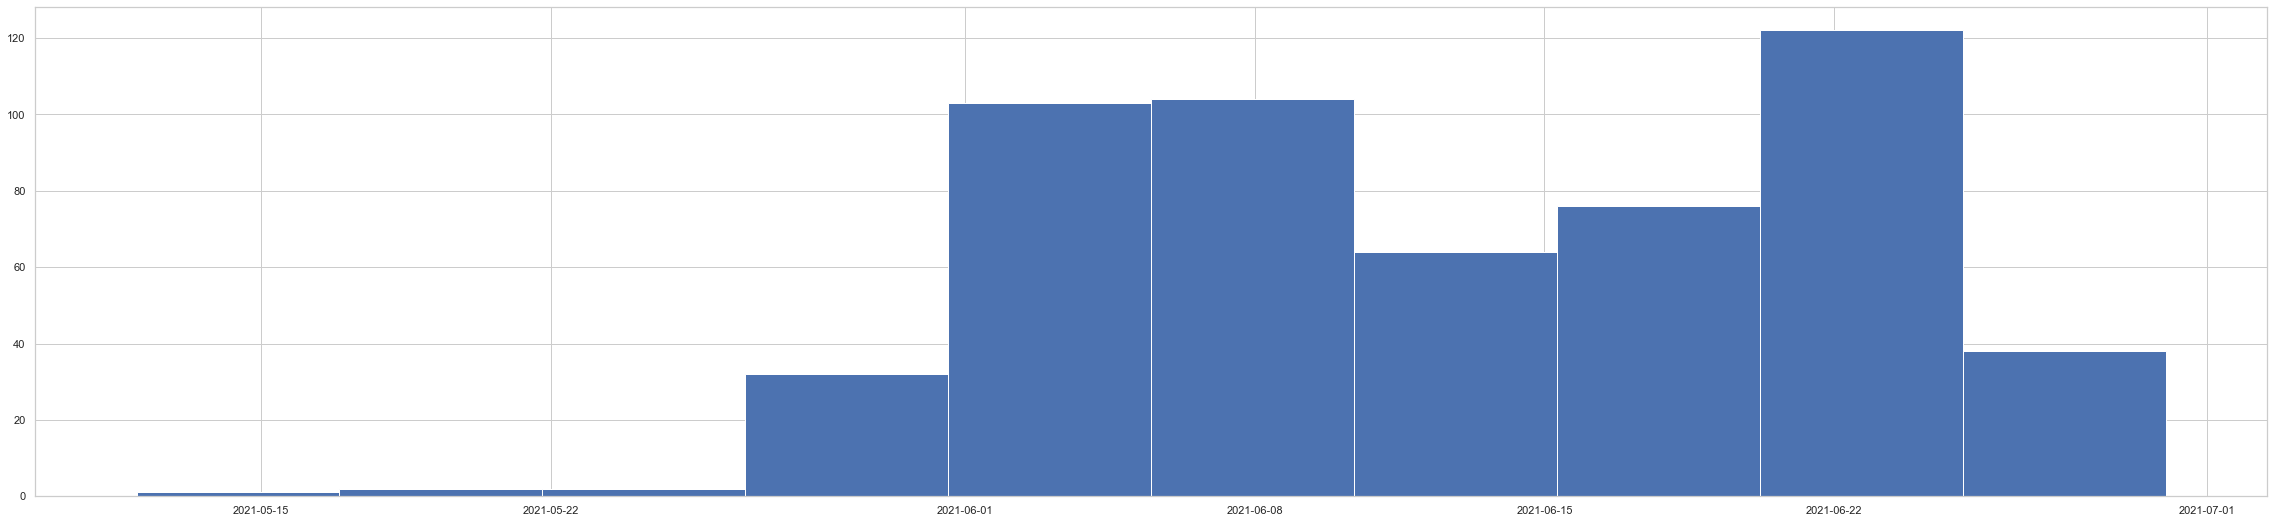

In [18]:
# гистограмма количества регистраций обращений по дням 
claims['дата_регистрации_обращения'].hist()

<AxesSubplot:>

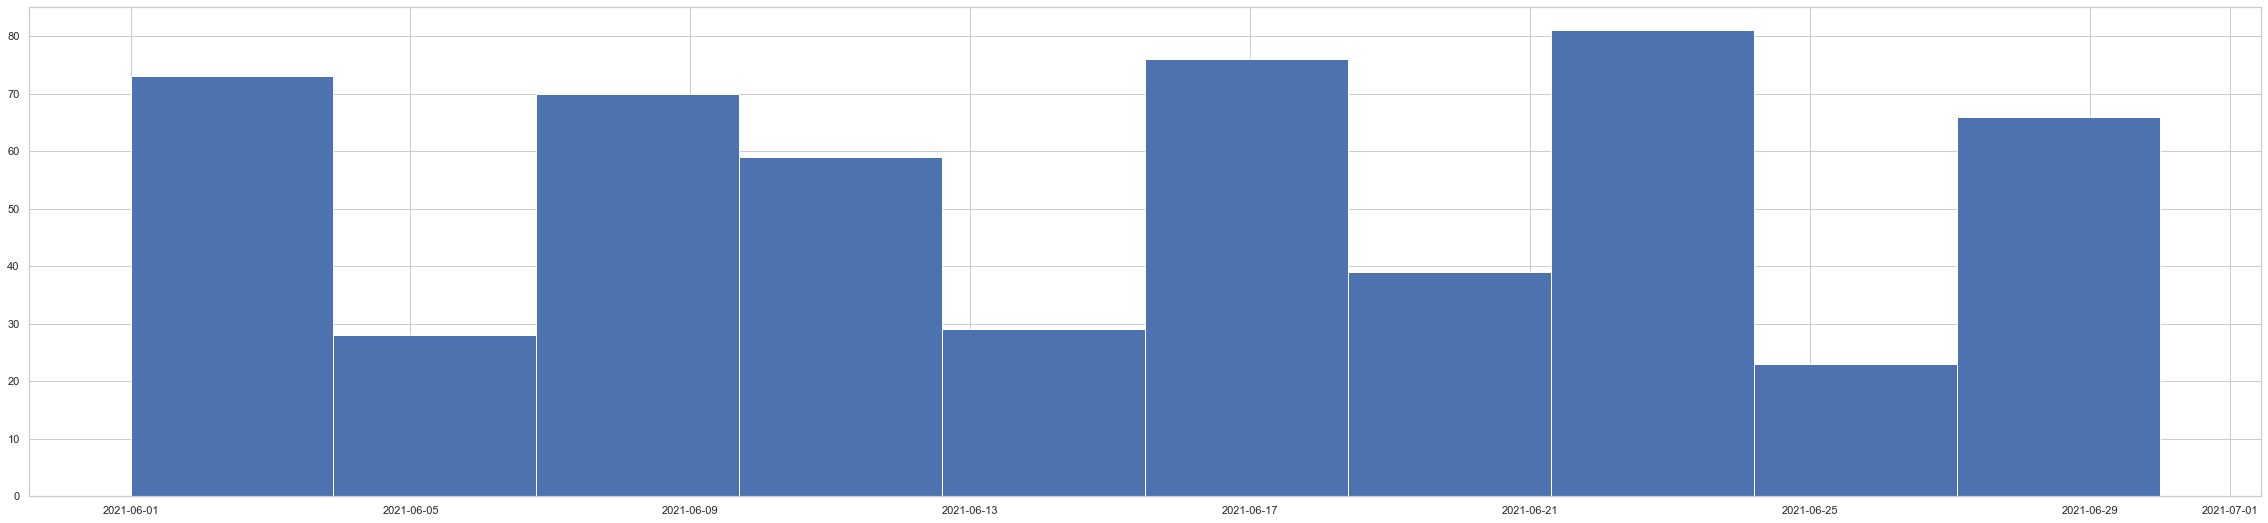

In [19]:
# гистограмма количества решений претензий по дням 
claims['дата_решения_обращения'].hist()

In [20]:
claims.head()

,номер_обращения,класс_обращения,продукт_обращения,стрим_обращения,группа_продуктов,тип_обращения,тематика_обращения,суть_обращения,итоговое_заключение,блок_продукта,канал_поступления_обращения,причина_обращения,тема_обращения,дата_регистрации_обращения,дата_решения_обращения,тема_пункта_обращения,разница_в_днях_в_решении_обращения
0,U2106170073,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,"ДОБРЫЙ ДЕНЬ,ХОТЕЛИ ВОСПОЛЬЗОВАТЬСЯ ПРЕДЛОЖЕНИЕ...","ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-17,2021-06-21,N/D,4
1,U2106160215,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,ЗДРАВСТВУЙТЕ! ПРОСИМ ИСПРАВИТЬ ОШИБКУ В ВАШЕМ ...,"ЗДРАВСТВУЙТЕ, СВЕТЛАНА АНАТОЛЬЕВНА.СПАСИБО, ЧТ...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-16,2021-06-21,N/D,5
2,U2106180004,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,ДОБРЫЙ ДЕНЬ. ХОТЕЛИ ИСПОЛЬЗОВАТЬ СКИДКУ НА РЕК...,"ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-18,2021-06-22,N/D,4
3,U2106160173,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,"ЗДРАВСТВУЙТЕ, МЫ НАЧАЛИ НАСТРАИВАТЬ РЕКЛАМУ, У...","ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-16,2021-06-21,N/D,5
4,U2106180054,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,МНЕ БЫЛО ИНТЕРЕСНО ВАШЕ ПРЕДЛОЖЕНИЕ ОТ ВАШЕГО ...,"ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-18,2021-06-22,N/D,4


In [21]:
# уникальные значения в колонке "продукт_обращения"
claims['продукт_обращения'].unique()

array(['НЕФИНАНСОВЫЕ СЕРВИСЫ', 'РКО', 'ЭКВАЙРИНГ', 'КАРТЫ И ВЫРУЧКА',
       'SMS-ИНФОРМИРОВАНИЕ', 'CASH-MANAGEMENT'], dtype=object)

In [22]:
# уникальные значения в колонке "класс_обращения"
claims['класс_обращения'].unique()

array(['ЖАЛОБА', 'ПРЕТЕНЗИЯ'], dtype=object)

In [23]:
# количество строк с классом обращения "ЖАЛОБА"
claims.query('класс_обращения == "ЖАЛОБА"').shape[0]

176

In [24]:
# количество строк с классом обращения "ПРЕТЕНЗИЯ"
claims.query('класс_обращения == "ПРЕТЕНЗИЯ"').shape[0]

368

In [25]:
# сумма пропущенные значений в колонке "суть_обращения"
claims['суть_обращения'].isna().sum()

0

In [26]:
# сумма пропущенные значений в колонке "итоговое_заключение"
claims['итоговое_заключение'].isna().sum()

0

In [27]:
# уникальные значения в колонке "тематика_обращения"
claims['тематика_обращения'].unique()

array(['ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА', 'НЕСОГЛАСИЕ С КОМИССИЕЙ',
       'ПРОБЛЕМЫ ПРИ ОБСЛУЖИВАНИИ ПРОДУКТА', 'СБОИ И ПРОБЛЕМЫ В РАБОТЕ',
       'ПРОБЛЕМЫ ПРИ ВЫДАЧЕ/ВНЕСЕНИИ НАЛИЧНЫХ', 'ДРУГОЕ',
       'ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ', 'ПРОБЛЕМЫ ПРИ ОФОРМЛЕНИИ'],
      dtype=object)

In [28]:
# количество обращений по тематике обращения
claims.groupby('тематика_обращения', as_index=False) \
    .agg({'номер_обращения' : 'count'}) \
    .sort_values('номер_обращения', ascending=False) \
    .rename({'номер_обращения' : 'количество_обращений'}, axis=1)

,тематика_обращения,количество_обращений
1,НЕСОГЛАСИЕ С КОМИССИЕЙ,361
5,ПРОБЛЕМЫ ПРИ ОБСЛУЖИВАНИИ ПРОДУКТА,132
4,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,15
0,ДРУГОЕ,13
7,СБОИ И ПРОБЛЕМЫ В РАБОТЕ,11
2,ПРОБЛЕМЫ ПРИ ВЫДАЧЕ/ВНЕСЕНИИ НАЛИЧНЫХ,7
6,ПРОБЛЕМЫ ПРИ ОФОРМЛЕНИИ,4
3,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ,1


In [29]:
claims.head(2)

,номер_обращения,класс_обращения,продукт_обращения,стрим_обращения,группа_продуктов,тип_обращения,тематика_обращения,суть_обращения,итоговое_заключение,блок_продукта,канал_поступления_обращения,причина_обращения,тема_обращения,дата_регистрации_обращения,дата_решения_обращения,тема_пункта_обращения,разница_в_днях_в_решении_обращения
0,U2106170073,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,"ДОБРЫЙ ДЕНЬ,ХОТЕЛИ ВОСПОЛЬЗОВАТЬСЯ ПРЕДЛОЖЕНИЕ...","ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-17,2021-06-21,N/D,4
1,U2106160215,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,ЗДРАВСТВУЙТЕ! ПРОСИМ ИСПРАВИТЬ ОШИБКУ В ВАШЕМ ...,"ЗДРАВСТВУЙТЕ, СВЕТЛАНА АНАТОЛЬЕВНА.СПАСИБО, ЧТ...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-16,2021-06-21,N/D,5


In [30]:
# уникальное значения в колонке "стрим обращения"
claims['стрим_обращения'].unique()

array(['DAILY BANKING', 'ЭКВАЙРИНГ'], dtype=object)

In [31]:
# количество обращений по стриму обращения 
claims.groupby('стрим_обращения').agg({'номер_обращения' : 'count'})

,номер_обращения
стрим_обращения,
DAILY BANKING,408
ЭКВАЙРИНГ,136


In [32]:
# уникальные значения в колонке 'группа продуктов'
claims['группа_продуктов'].unique()

array(['КЛУБ КЛИЕНТОВ', 'ПУ', 'ТОРГОВЫЙ ЭКВАЙРИНГ', 'КАРТЫ ДЛЯ БИЗНЕСА',
       'SMS-ОПОВЕЩЕНИЕ', 'ON-LINE ИНДИКАТОРЫ РИСКОВ'], dtype=object)

In [33]:
# количество обращений по группе продуктов
claims.groupby('группа_продуктов', as_index=False) \
    .agg({'номер_обращения' : 'count'}) \
    .sort_values('номер_обращения', ascending=False) \
    .rename({'номер_обращения' : 'количество_обращений'}, axis=1)

,группа_продуктов,количество_обращений
4,ПУ,294
5,ТОРГОВЫЙ ЭКВАЙРИНГ,136
2,КАРТЫ ДЛЯ БИЗНЕСА,57
0,ON-LINE ИНДИКАТОРЫ РИСКОВ,27
3,КЛУБ КЛИЕНТОВ,17
1,SMS-ОПОВЕЩЕНИЕ,13


In [34]:
# уникальные значения в колоноке "канал поступления обращения"
claims['канал_поступления_обращения'].unique()

array(['ОБРАТНАЯ СВЯЗЬ', 'ТЕЛЕФОННЫЙ ЦЕНТР', 'ИНТЕРНЕТ БАНК', 'ОТДЕЛЕНИЕ',
       'ЧАТ "АЛЬФА-МОБАЙЛ"', 'KMP', 'КАНЦЕЛЯРИЯ', 'ПМ', 'ОСЛК', 'KM',
       'УПМ', 'САЙТ WWW.BANKI.RU', 'ЦЕНТРАЛЬНЫЙ ОФИС', 'ЦБ МОСКВА',
       'ПОЛЕВОЙ', 'УДАЛЕННЫЙ МЕНЕДЖЕР СОПРОВОЖДЕНИЯ', 'ЦБ РЕГИОНЫ'],
      dtype=object)

In [35]:
# количество обращения по каналу поступления обращения
claims.groupby('канал_поступления_обращения', as_index=False) \
    .agg({'номер_обращения' : 'count'}) \
    .sort_values('номер_обращения', ascending=False) \
    .rename({'номер_обращения' : 'количество_обращений'}, axis=1) 


,канал_поступления_обращения,количество_обращений
6,ОТДЕЛЕНИЕ,196
10,ТЕЛЕФОННЫЙ ЦЕНТР,182
2,ИНТЕРНЕТ БАНК,81
16,"ЧАТ ""АЛЬФА-МОБАЙЛ""",34
4,ОБРАТНАЯ СВЯЗЬ,17
1,KMP,10
3,КАНЦЕЛЯРИЯ,7
0,KM,5
9,САЙТ WWW.BANKI.RU,2
13,ЦБ МОСКВА,2


In [36]:
# уникальные значения в колонке 'причина обращения'
claims['причина_обращения'].nunique()

46

In [37]:
# количество обращений по причинам обращения 
claims.groupby('причина_обращения', as_index=False) \
    .agg({'номер_обращения' : 'count'}) \
    .sort_values('номер_обращения', ascending=False) \
    .rename({'номер_обращения' : 'количество_обращений'}, axis=1)

,причина_обращения,количество_обращений
30,РАСЧЕТНЫЙ СЧЁТ / ОБСЛУЖИВАНИЕ / НЕПОНИМАНИЕ КЛ...,80
14,ОБСЛУЖИВАНИЕ И СОПРОВОЖДЕНИЕ / ПРОБЛЕМЫ С ОБОР...,61
13,ОБСЛУЖИВАНИЕ И СОПРОВОЖДЕНИЕ / ДРУГОЕ,46
28,РАСЧЕТНЫЙ СЧЁТ / ЗАЧИСЛЕНИЕ В ВАЛЮТЕ РФ / ПУ 1...,36
33,РАСЧЕТНЫЙ СЧЁТ / ПЕРЕВОДНЫЕ ОПЕРАЦИИ / НЕПОНИМ...,32
12,НИБ / ПОДДЕРЖКА СЕРВИСА ON-LINE ИНДИКАТОРЫ РИСКОВ,27
8,КАРТА ДЛЯ БИЗНЕСА / ОБСЛУЖИВАНИЕ / НЕПОНИМАНИЕ...,25
35,РАСЧЕТНЫЙ СЧЁТ / ПЕРЕВОДНЫЕ ОПЕРАЦИИ / НЕПОНИМ...,22
40,РАСЧЕТНЫЙ СЧЕТ / ОТКРЫТИЕ СЧЕТА / КАРТОТЕКА ЗА...,21
24,РАСЧЕТНЫЙ СЧЁТ / ВЫПИСКА/СПРАВКА / НЕПОНИМАНИЕ...,16


In [38]:
# количество обращений по темам обращения 
claims.groupby('тема_обращения', as_index=False) \
    .agg({'номер_обращения' : 'count'}) \
    .sort_values('номер_обращения', ascending=False) \
    .rename({'номер_обращения' : 'количество_обращений'}, axis=1)

,тема_обращения,количество_обращений
0,КОМИССИИ/ТАРИФЫ,361
5,УСЛУГИ / ЭКВАЙРИНГ,136
4,УСЛУГИ / КЛУБ КЛИЕНТОВ,17
2,УКД (ТЕХ. ПРОБЛЕМА) / СМС-ИНФОРМИРОВАНИЕ,13
3,УСЛУГИ / ДРУГОЕ,10
1,ОПЕРАЦИИ ПО СЧЕТУ / ОПЕРАЦИИ ПО СЧЕТУ (НЕ КОМИ...,7


In [39]:
# уникальные значения в колонке "тема пункта обращения"
claims['тема_пункта_обращения'].unique()

array(['N/D', 'КОМИССИИ/ТАРИФЫ',
       'ОПЕРАЦИИ ПО СЧЕТУ / ОПЕРАЦИИ ПО СЧЕТУ (НЕ КОМИССИИ)'],
      dtype=object)

In [40]:
claims.head()

,номер_обращения,класс_обращения,продукт_обращения,стрим_обращения,группа_продуктов,тип_обращения,тематика_обращения,суть_обращения,итоговое_заключение,блок_продукта,канал_поступления_обращения,причина_обращения,тема_обращения,дата_регистрации_обращения,дата_решения_обращения,тема_пункта_обращения,разница_в_днях_в_решении_обращения
0,U2106170073,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,"ДОБРЫЙ ДЕНЬ,ХОТЕЛИ ВОСПОЛЬЗОВАТЬСЯ ПРЕДЛОЖЕНИЕ...","ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-17,2021-06-21,N/D,4
1,U2106160215,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,ЗДРАВСТВУЙТЕ! ПРОСИМ ИСПРАВИТЬ ОШИБКУ В ВАШЕМ ...,"ЗДРАВСТВУЙТЕ, СВЕТЛАНА АНАТОЛЬЕВНА.СПАСИБО, ЧТ...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-16,2021-06-21,N/D,5
2,U2106180004,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,ДОБРЫЙ ДЕНЬ. ХОТЕЛИ ИСПОЛЬЗОВАТЬ СКИДКУ НА РЕК...,"ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-18,2021-06-22,N/D,4
3,U2106160173,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,"ЗДРАВСТВУЙТЕ, МЫ НАЧАЛИ НАСТРАИВАТЬ РЕКЛАМУ, У...","ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-16,2021-06-21,N/D,5
4,U2106180054,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,МНЕ БЫЛО ИНТЕРЕСНО ВАШЕ ПРЕДЛОЖЕНИЕ ОТ ВАШЕГО ...,"ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-18,2021-06-22,N/D,4


<AxesSubplot:>

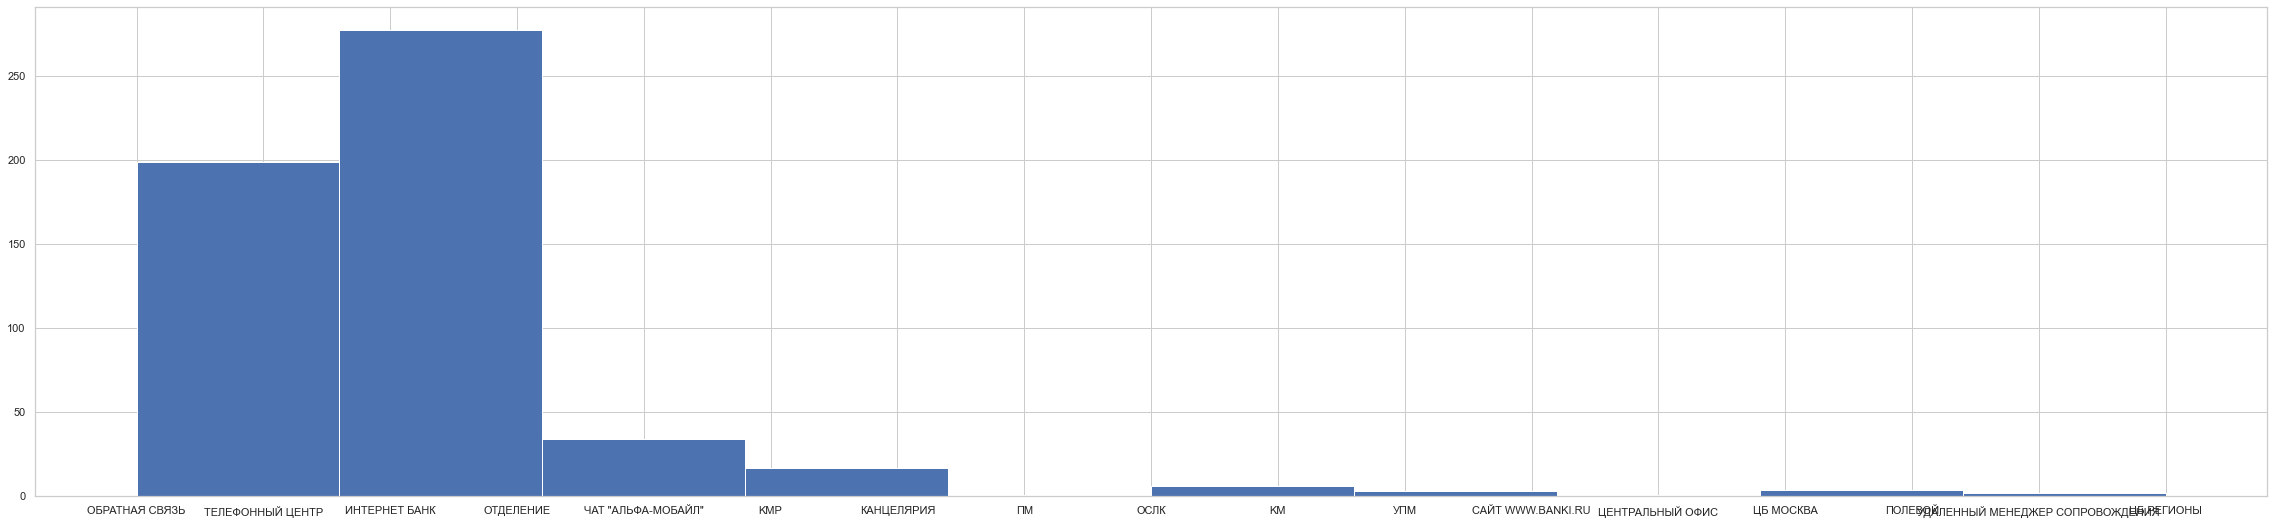

In [41]:
claims['канал_поступления_обращения'].hist()

<AxesSubplot:>

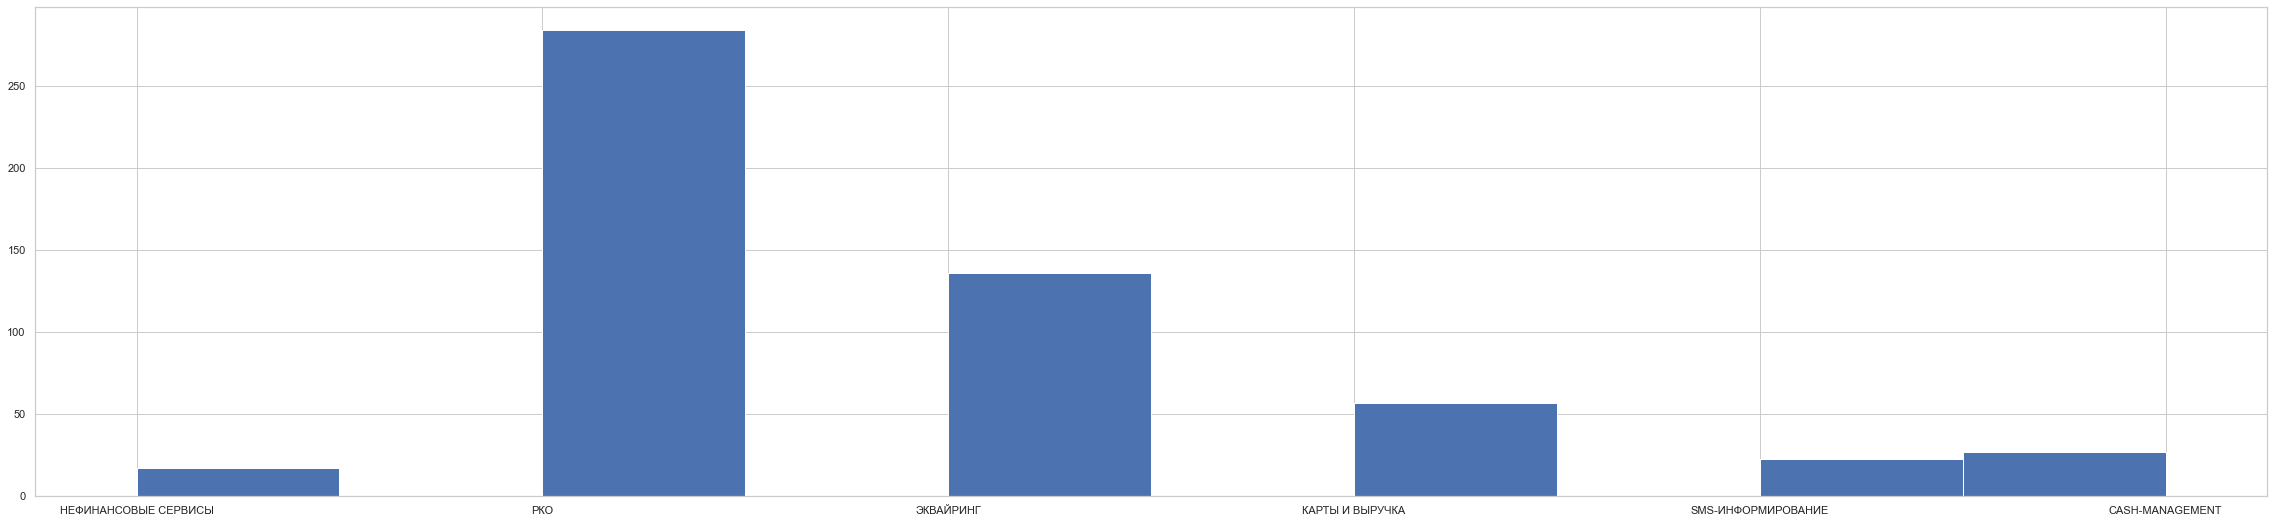

In [42]:
claims['продукт_обращения'].hist()

<AxesSubplot:>

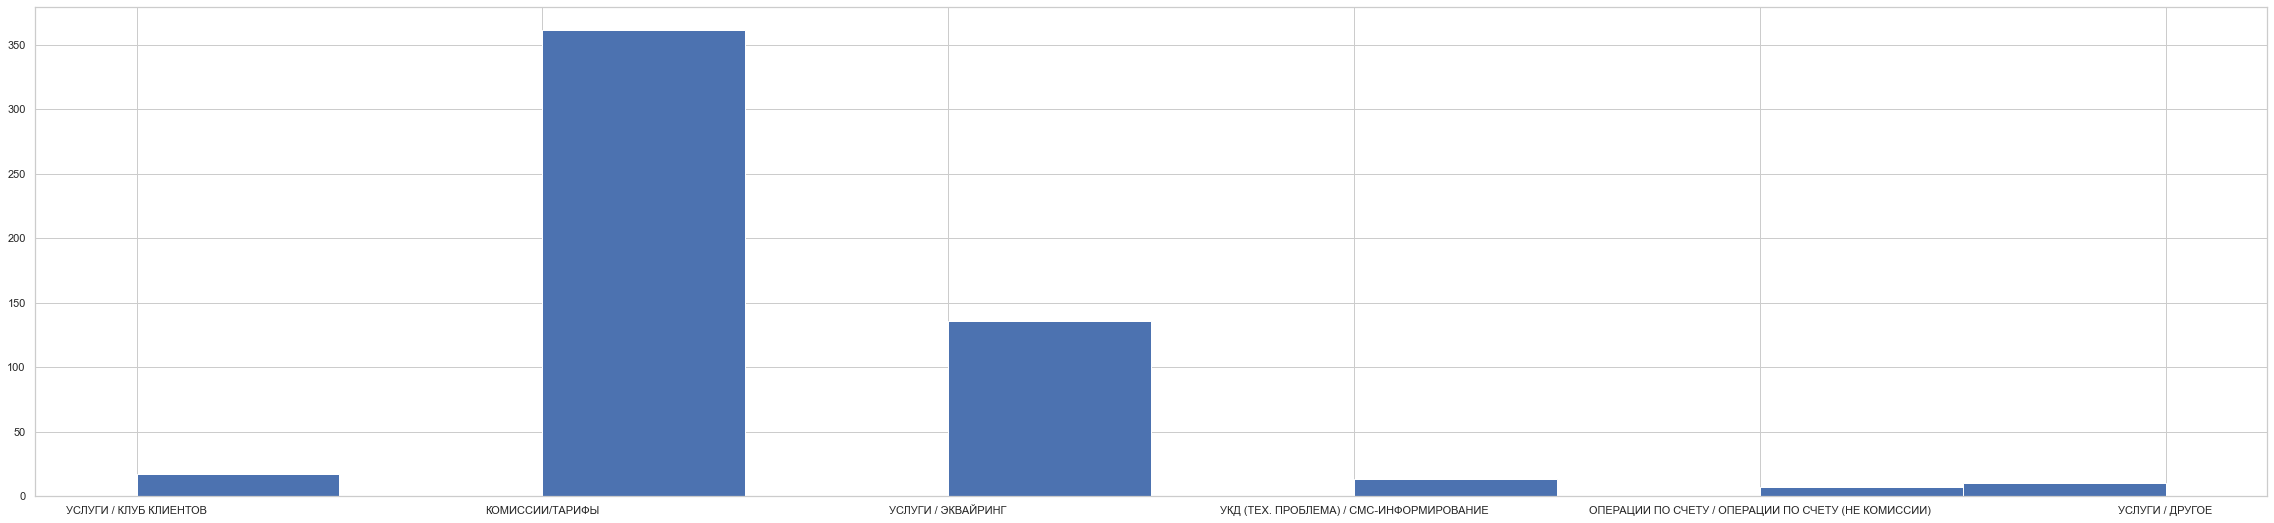

In [43]:
claims['тема_обращения'].hist()

<AxesSubplot:>

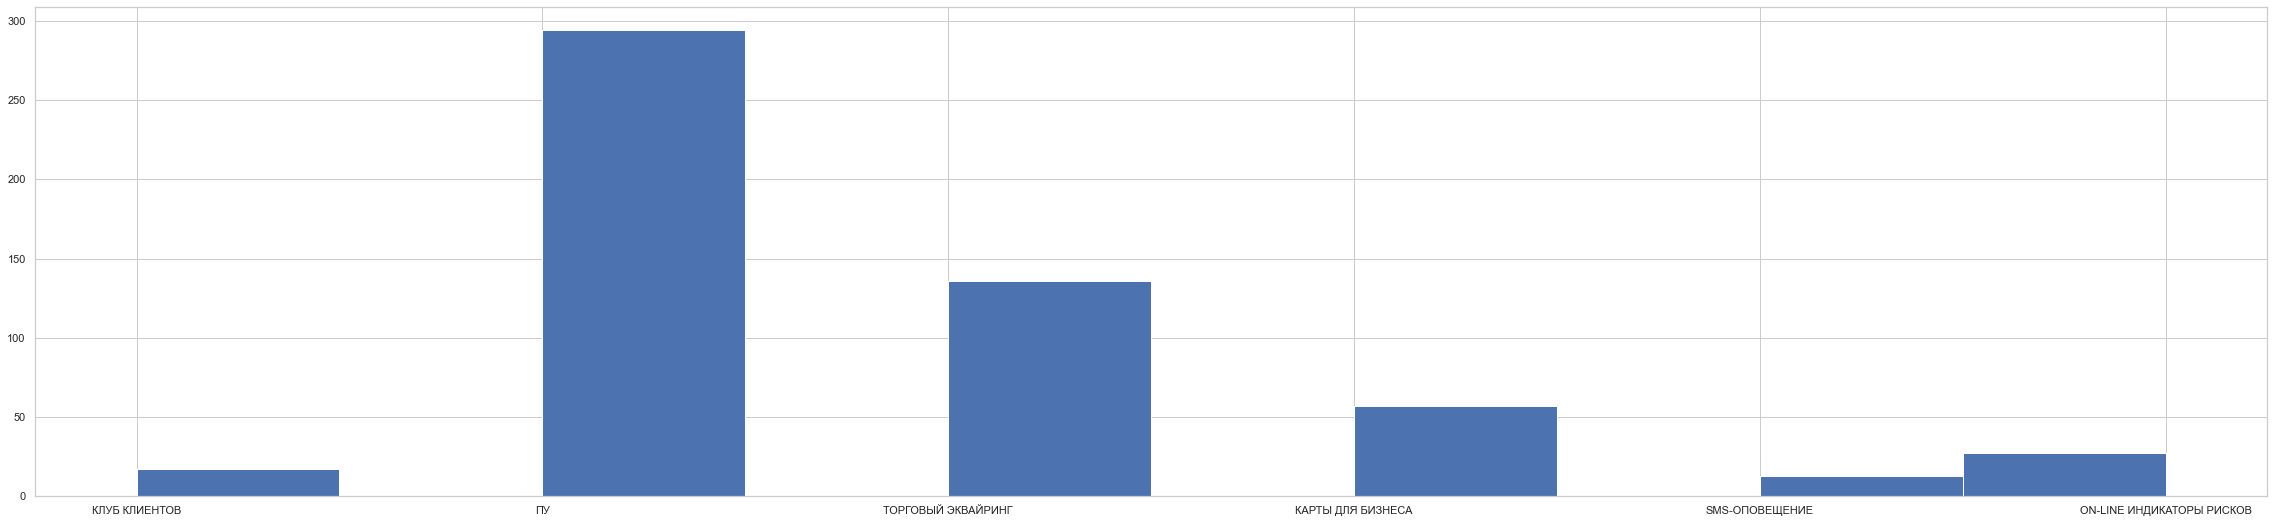

In [45]:
# количество претензий по группе продуктов 
claims['группа_продуктов'].hist()

<AxesSubplot:>

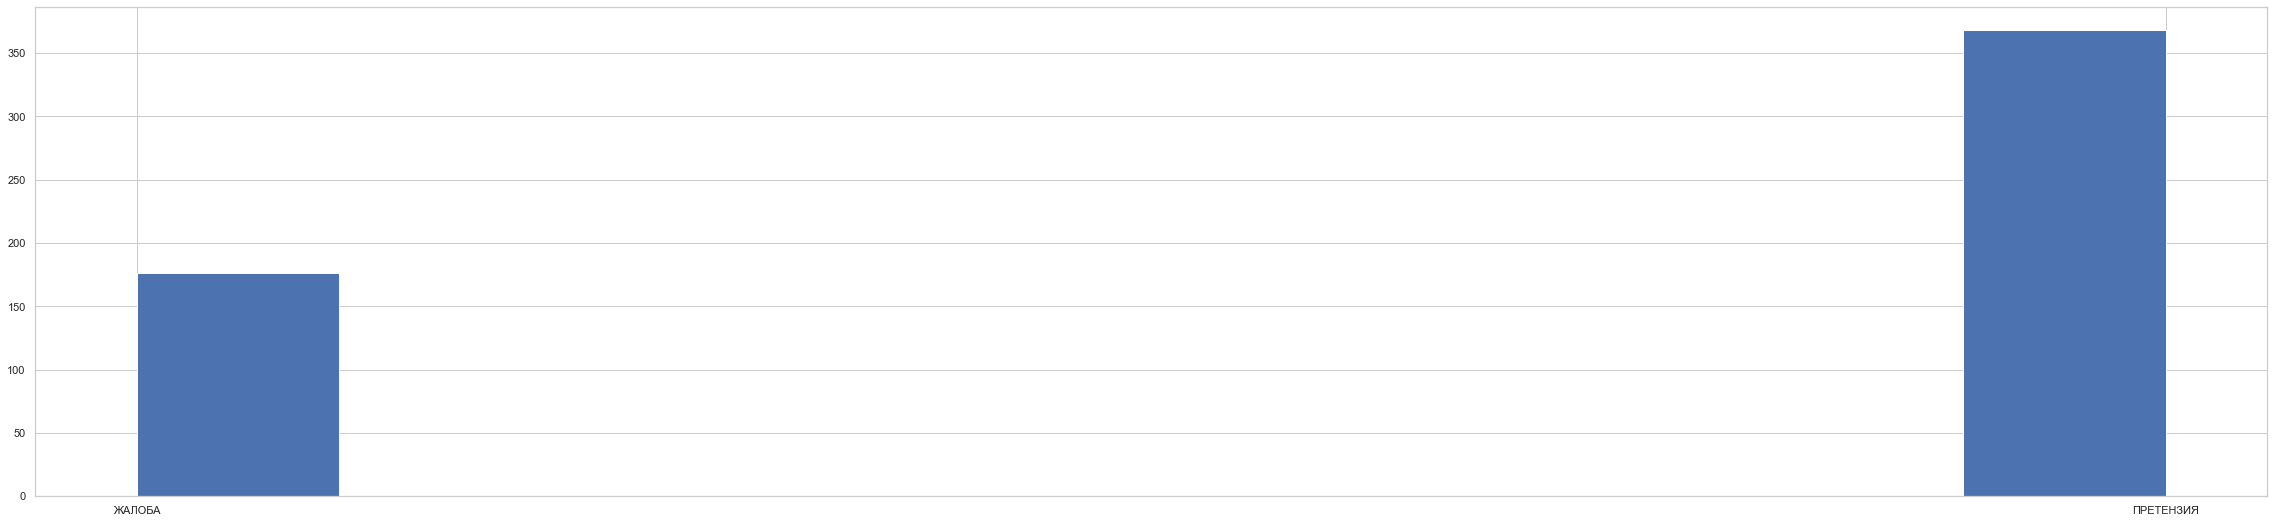

In [46]:
# к-во обращений по классу обращения
claims['класс_обращения'].hist()

In [47]:
# создаем колонку "день_недели_регистрации_обращения"
claims['день_недели_регистрации_обращения'] = claims['дата_регистрации_обращения'].dt.day_name()

<AxesSubplot:>

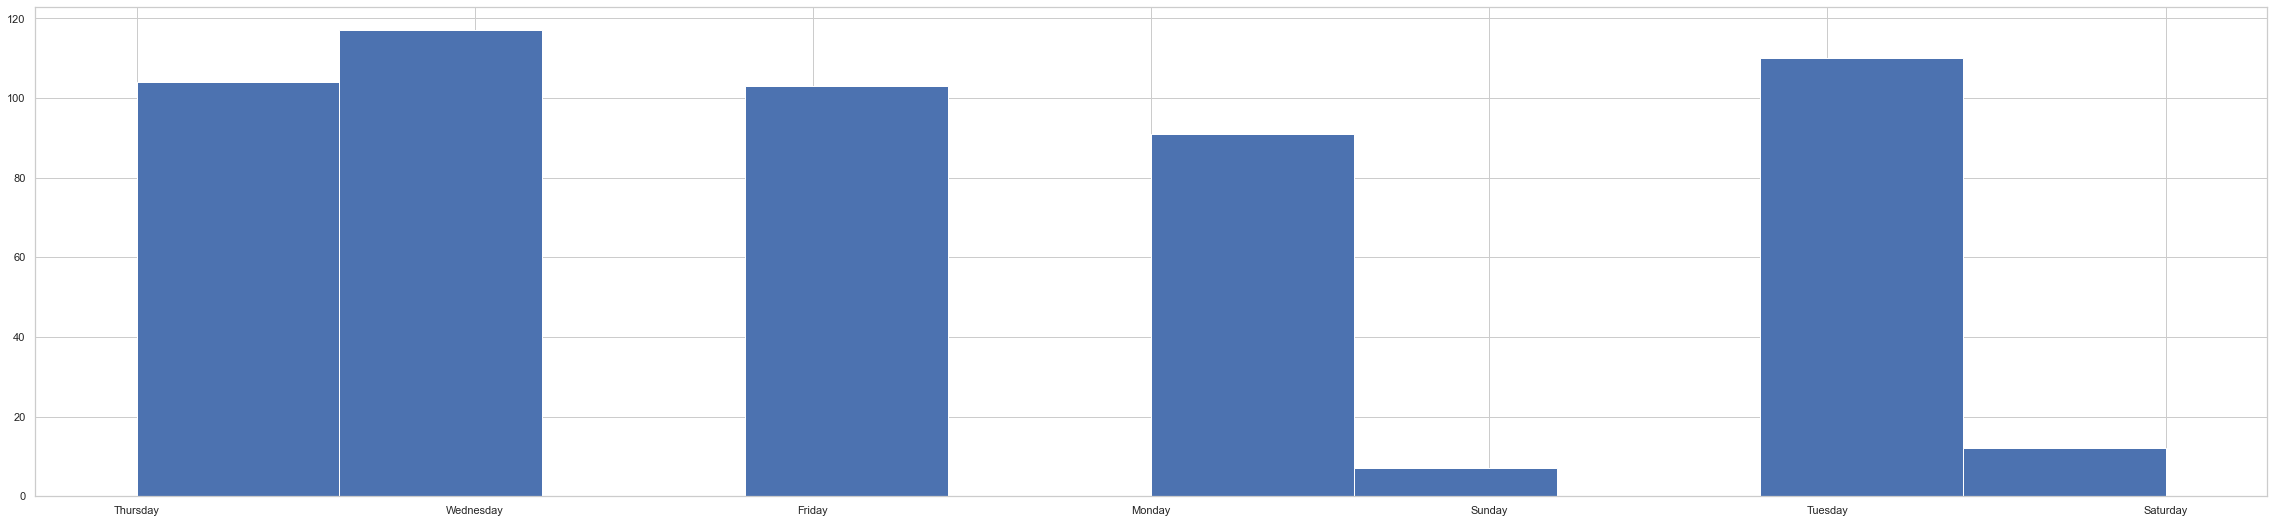

In [48]:
# гистограмма к-во зарегистрованных обращений по дням недели
claims['день_недели_регистрации_обращения'].hist()

In [49]:
# создаем колонку "день_недели_решения_обращения"
claims['день_недели_решения_обращения'] = claims['дата_решения_обращения'].dt.day_name()

<AxesSubplot:>

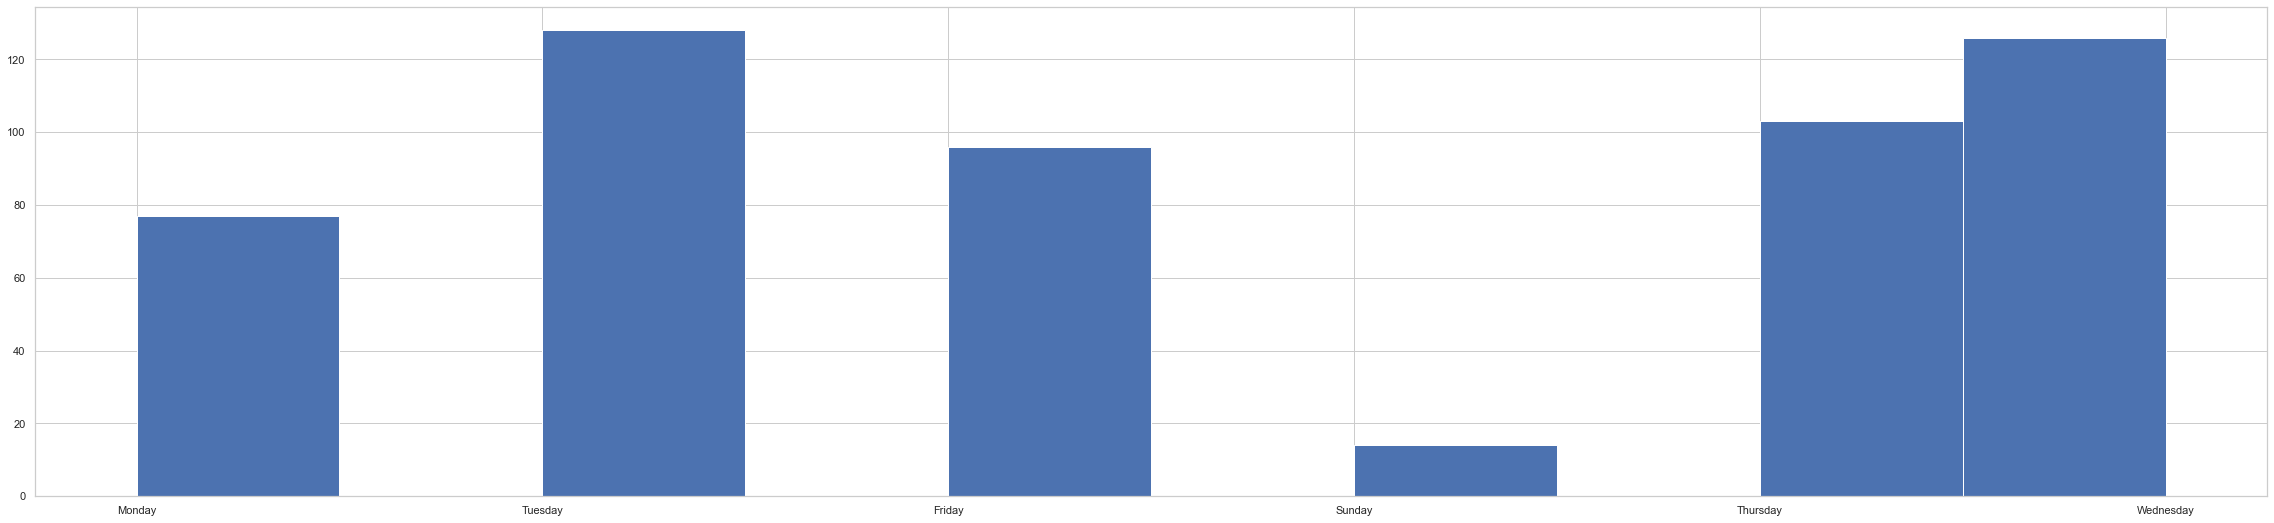

In [50]:
# гистограмма к-во решенных обращений по дням недели
claims['день_недели_решения_обращения'].hist()

In [51]:
claims['дата_регистрации_обращения'] = claims['дата_регистрации_обращения'].dt.date

In [52]:
claims['дата_решения_обращения'] = claims['дата_решения_обращения'].dt.date

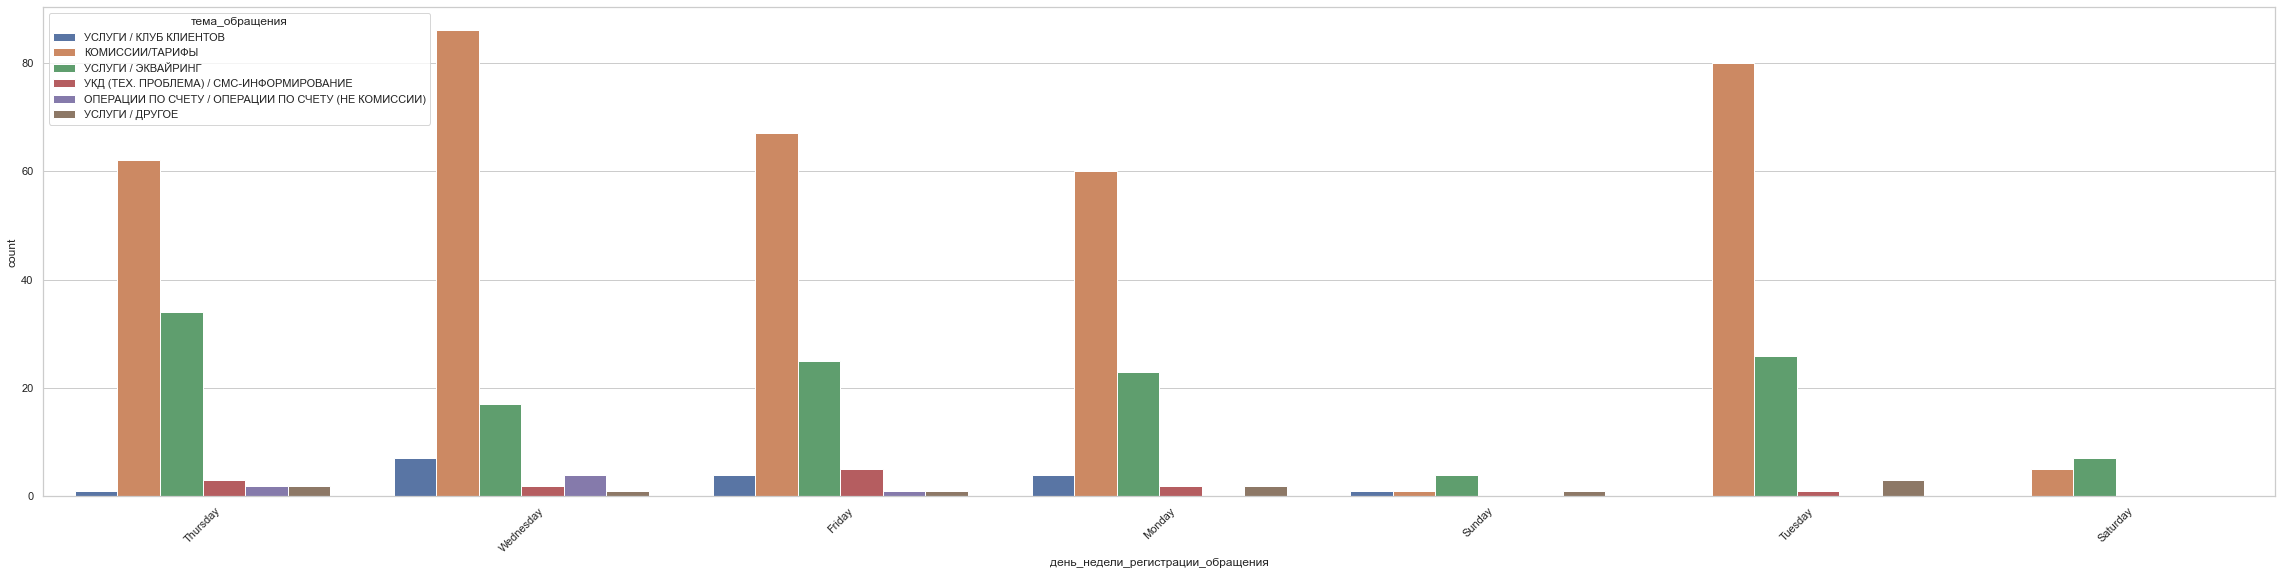

In [53]:
# гистограмма к-во зарегистрированных обращений по дням недели и по темам обращений
sns.countplot(x='день_недели_регистрации_обращения', hue='тема_обращения', data=claims)
plt.xticks(rotation=45);

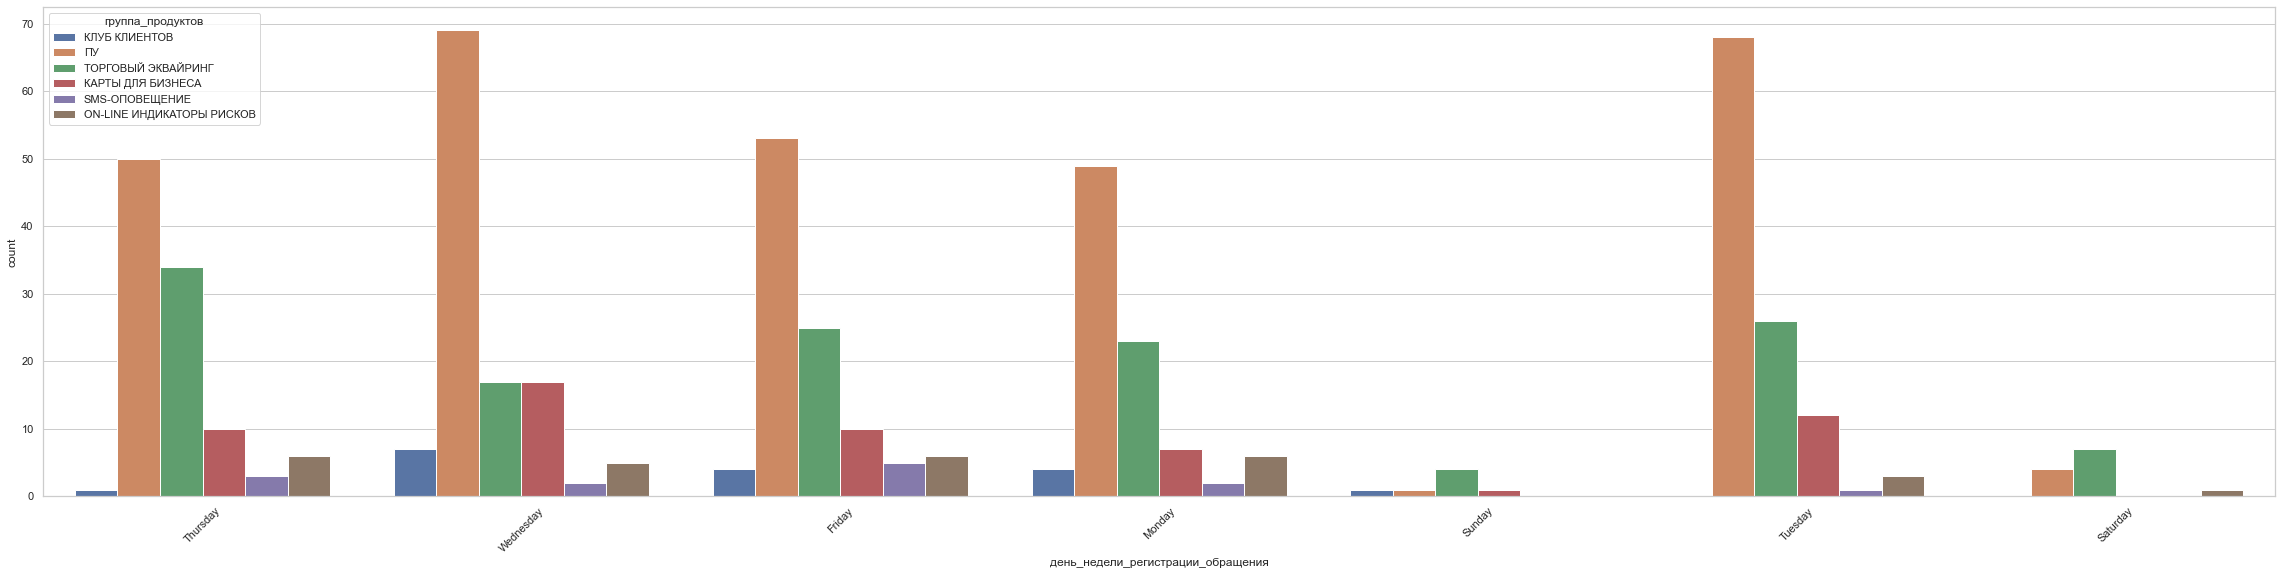

In [54]:
# гистограмма к-во зарегистрированных обращений по дням недели и по группе продуктов
sns.countplot(x='день_недели_регистрации_обращения', hue='группа_продуктов', data=claims)
plt.xticks(rotation=45);

In [55]:
claims.head(2)

,номер_обращения,класс_обращения,продукт_обращения,стрим_обращения,группа_продуктов,тип_обращения,тематика_обращения,суть_обращения,итоговое_заключение,блок_продукта,канал_поступления_обращения,причина_обращения,тема_обращения,дата_регистрации_обращения,дата_решения_обращения,тема_пункта_обращения,разница_в_днях_в_решении_обращения,день_недели_регистрации_обращения,день_недели_решения_обращения
0,U2106170073,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,"ДОБРЫЙ ДЕНЬ,ХОТЕЛИ ВОСПОЛЬЗОВАТЬСЯ ПРЕДЛОЖЕНИЕ...","ЗДРАВСТВУЙТЕ!СПАСИБО, ЧТО НАПИСАЛИ НАМ О СИТУА...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-17,2021-06-21,N/D,4,Thursday,Monday
1,U2106160215,ЖАЛОБА,НЕФИНАНСОВЫЕ СЕРВИСЫ,DAILY BANKING,КЛУБ КЛИЕНТОВ,КЛИЕНТСКИЕ ПУТИ,ПРОБЛЕМЫ ПРИ ИСПОЛЬЗОВАНИИ СЕРВИСА,ЗДРАВСТВУЙТЕ! ПРОСИМ ИСПРАВИТЬ ОШИБКУ В ВАШЕМ ...,"ЗДРАВСТВУЙТЕ, СВЕТЛАНА АНАТОЛЬЕВНА.СПАСИБО, ЧТ...",НЕ ОПРЕДЕЛЕНО,ОБРАТНАЯ СВЯЗЬ,ОШИБКИ С ПРОМО-КОДОМ / ТЕХ. ОШИБКА,УСЛУГИ / КЛУБ КЛИЕНТОВ,2021-06-16,2021-06-21,N/D,5,Wednesday,Monday
